In [3]:
import matplotlib.pyplot as plt
import torch
import torchvision
import time

In [58]:
#hyper-parameters
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 2000
LR = 1

In [59]:
torch.cuda.is_available(),torch.cuda.get_device_name(),torch.cuda.device_count()

(True, 'NVIDIA Quadro GV100', 2)

In [60]:
train_loader = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST('data', train=True, download=True, 
                           transform=torchvision.transforms.Compose([
                           torchvision.transforms.ToTensor(),
                           torchvision.transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=BATCH_SIZE, shuffle=True)
print(len(train_loader)) #the size of dataset, 60000 of images



#load test data
test_loader = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST('data', train=False, 
                           transform=torchvision.transforms.Compose([
                           torchvision.transforms.ToTensor(),
                           torchvision.transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=BATCH_SIZE, shuffle=True)
print(len(test_loader)) #size of test data , 10000 images

30
5


In [61]:
#model  LINEAR REGRESSION
model = torch.nn.Sequential(
    
    torch.nn.Linear(784,10),
)
model.to(DEVICE)

Sequential(
  (0): Linear(in_features=784, out_features=10, bias=True)
)

In [62]:
# loss function & optimizater
loss_fn = torch.nn.NLLLoss() #nll_loss for classification
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [63]:
# Accuracy check round 1(before training)
start = time.time()

correct_counter = 0 # count the number of right prediction
data_counter = 0 # count the number of data

for image,label in test_loader:#the size of image and label depends on BATCH_SIZE
    
    image = image.reshape(-1,784) #change image's shape so each row is a image 

    output = model(image.cuda())
    
    label_list = label.tolist()# turn label to list for comparison with prediction
    
    data_counter += len(label_list) # the number of test datas
    
    for i in range(output.shape[0]): # =512
        if int(torch.argmax(output[i])) == label_list[i]: # prediction = label
            correct_counter += 1 

end = time.time()
accuracy = correct_counter/data_counter
print('accuracy {} time {} datasize {} correctness {}'
      .format(accuracy, end-start, data_counter, correct_counter))
accuracy, end-start, 

accuracy 0.1021 time 1.516535997390747 datasize 10000 correctness 1021


(0.1021, 1.516535997390747)

In [64]:
#Trainning process
loss_list = []

for image,label in train_loader:
    
    optimizer.zero_grad()
    
    input = image.reshape(-1,784)
    output = model(input.cuda())
    
    loss = loss_fn(output,label.cuda())
    loss_list.append(loss.item())
    loss.backward()
    optimizer.step()
    
    print('loss {}'.format(loss.item()))

loss -0.08290553838014603
loss -34.99876403808594
loss -69.23346710205078
loss -103.71654510498047
loss -139.2195587158203
loss -173.33062744140625
loss -207.92510986328125
loss -242.70755004882812
loss -275.9294128417969
loss -315.5799255371094
loss -348.5542297363281
loss -381.8935852050781
loss -416.6867370605469
loss -447.8599853515625
loss -481.7548828125
loss -507.7598571777344
loss -557.5250854492188
loss -584.379150390625
loss -622.9807739257812
loss -649.9150390625
loss -692.0927734375
loss -724.3031005859375
loss -759.8641967773438
loss -789.7433471679688
loss -829.8775024414062
loss -872.2908325195312
loss -896.6239013671875
loss -919.31005859375
loss -966.361083984375
loss -1002.5565795898438


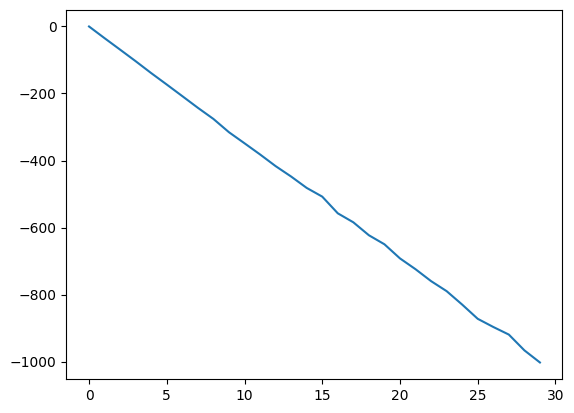

In [65]:
plt.plot(list(loss_list))

In [66]:
# Accuracy check round 2(after training)
start = time.time()

correct_counter = 0 # count the number of right prediction
data_counter = 0 # count the number of data

for image,label in test_loader:#the size of image and label depends on BATCH_SIZE
    
    image = image.reshape(-1,784) #change image's shape so each row is a image 

    output = model(image.cuda())
    
    label_list = label.tolist()# turn label to list for comparison with prediction
    
    data_counter += len(label_list) # the number of test datas
    
    for i in range(output.shape[0]): # =512
        if int(torch.argmax(output[i])) == label_list[i]: # prediction = label
            correct_counter += 1 

end = time.time()
accuracy = correct_counter/data_counter
print('accuracy {} time {} datasize {} correctness {}'
      .format(accuracy, end-start, data_counter, correct_counter))
accuracy, end-start

accuracy 0.7375 time 1.5830318927764893 datasize 10000 correctness 7375


(0.7375, 1.5830318927764893)